# Conexão com o Postgres

In [2]:
# instalar a biblioteca
!pip install psycopg2-binary

In [3]:
import psycopg2

In [60]:
con = psycopg2.connect(
    host="localhost",
    port=5432,
    dbname="iesb",
    user="postgres",
    password="postgres"
)

In [61]:
cur = con.cursor()

## Plotar Dados no MatPlotLib

In [10]:
cur.execute("CREATE SCHEMA empresa")
con.commit()

In [11]:
cur.execute("""
    CREATE TABLE empresa.vendas (id SERIAL PRIMARY KEY, data_venda DATE)
""")

In [12]:
con.commit()

### Gerar dados

In [13]:
import random

In [62]:
i = 0
for i in range(1, 10000):
    mes = (int)(random.random()*12+1)
    mes = str(mes)
    if len(mes) < 2:
        mes = '0' + mes
    dia = (int)(random.random()*28+1)
    dia = str(dia)
    if len(dia) < 2:
        dia = '0' + dia
    data = "2022/" + mes + "/" + dia
    cur.execute("INSERT INTO empresa.vendas(data_venda) VALUES ('" + data + "')")
    if i > 100:
        con.commit()
        i = 0
    i += 1
con.commit()

In [63]:
cur.execute("""
SELECT
  CONCAT('M',LPAD(EXTRACT(month FROM dia)::TEXT,2,'0')) AS mes,
  total
  FROM (
	SELECT 
		DATE_TRUNC('month',data_venda) AS dia, 
		COUNT(*) AS total
	FROM empresa.vendas
	GROUP BY DATE_TRUNC('month',data_venda)
) AS subconsulta
ORDER BY mes
""")
results = cur.fetchall()

In [64]:
x = []
y = []
for row in results:
    x.append(row[0]) # mes
    y.append(row[1]) # qtd

print(x,y)

['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09', 'M10', 'M11', 'M12'] [1699, 1668, 1672, 1704, 1614, 1686, 1702, 1601, 1696, 1699, 1633, 1624]


In [65]:
con.close()

In [26]:
import matplotlib.pyplot as plt

### Gráfico de Linhas

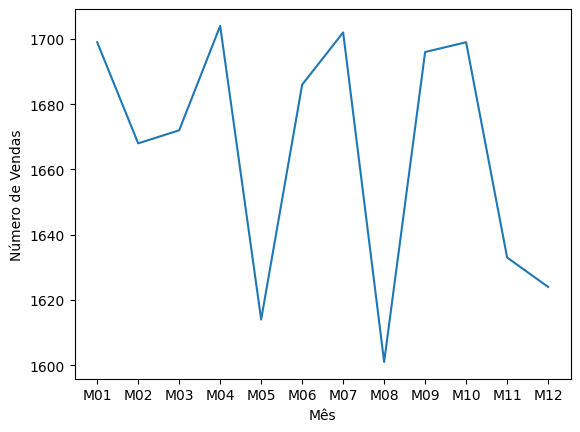

In [66]:
plt.plot(x,y)
plt.xlabel("Mês")
plt.ylabel("Número de Vendas")
plt.show()

### Gráfico de Dispersão (ScatterPlot)

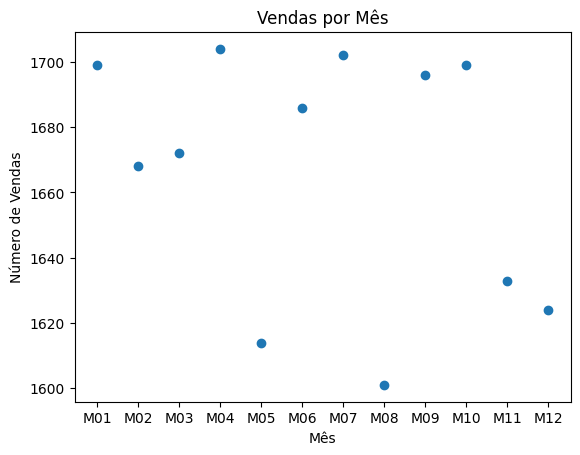

In [67]:
plt.scatter(x,y)
plt.title("Vendas por Mês")
plt.xlabel("Mês")
plt.ylabel("Número de Vendas")
plt.show()

### Gráfico de Barras

In [29]:
import numpy as np

In [31]:
for i, alpha in enumerate(np.linspace(0,1,12)):
    print(alpha)

0.0
0.09090909090909091
0.18181818181818182
0.2727272727272727
0.36363636363636365
0.4545454545454546
0.5454545454545454
0.6363636363636364
0.7272727272727273
0.8181818181818182
0.9090909090909092
1.0


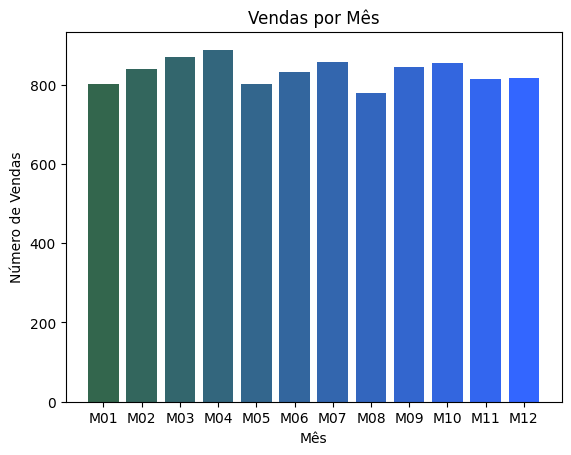

In [35]:
cores = []
cor1 = 0.2 # vermelho
cor2 = 0.4 # verde

for i, alpha in enumerate(np.linspace(0.3, 1, 12)):
    color = (cor1, cor2, alpha)
    cores.append(color)

plt.bar(x, y, color=cores, width=0.8)
plt.xlabel("Mês")
plt.ylabel("Número de Vendas")
plt.title("Vendas por Mês")
plt.show()

## Gŕafico de Pizza

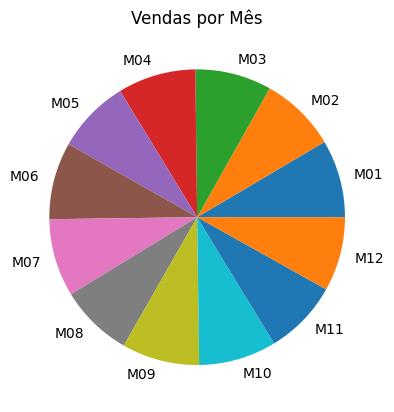

In [68]:
plt.pie(y, labels=x)
plt.title("Vendas por Mês")
plt.show()

### Top 6

In [69]:
tupla = zip(y, x)

In [70]:
tupla_ordenada = sorted(tupla, key=lambda y: y[0])

In [71]:
print(tupla_ordenada)

[(1601, 'M08'), (1614, 'M05'), (1624, 'M12'), (1633, 'M11'), (1668, 'M02'), (1672, 'M03'), (1686, 'M06'), (1696, 'M09'), (1699, 'M01'), (1699, 'M10'), (1702, 'M07'), (1704, 'M04')]


In [72]:
valores = [t[0] for t in tupla_ordenada]
meses = [t[1] for t in tupla_ordenada]

In [73]:
while len(valores) > 6:
    del valores[0]
    del meses[0]

In [74]:
cores = []
cor1 = 0.8 # vermelho
cor2 = 0.4 # verde

for i, alpha in enumerate(np.linspace(0.5, 1, 6)):
    color = (cor1, alpha, cor2)
    cores.append(color)

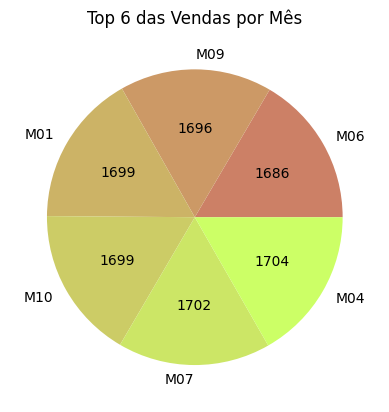

In [75]:
plt.pie(valores, colors=cores, labels=meses)
for i, valor in enumerate(valores):
    angulo = 2 * 3.14159 * (sum(valores[:i]) + valor / 2) / sum(valores)
    c = 1.2 * 0.5 * np.cos(angulo)
    s = 1.2 * 0.5 * np.sin(angulo)
    plt.text(c, s, str(valor), ha='center', va='center', color='black')
plt.title("Top 6 das Vendas por Mês")
plt.show()

### Dicas

In [76]:
j = 4

j = "Olá"

In [78]:
k = 2
if (k > 3):
    print("Olá")
else:
    print("Oi")

Oi


In [81]:
k = 8
if (k > 3):
    print("A1")
elif k < 3:
    print("A2")
elif k > 4:
    print("A3")

A1


In [80]:
if k > 4:
    print("A1")
else: 
    if k < 3:
        print("A2")
    else:
        if k > 3:
            print("A3")

A1


In [84]:
k = 2
if k < 2:
    pass
else:
    print("A1")
print("A0")

A1
A0


In [85]:
for i in range(1,3):
    t = t + np.sin(54) * cos(45*i)
print(t)    

NameError: name 't' is not defined